In [88]:
import pandas as pd
import matplotlib.pyplot as plt

### 单变量线性回归

#### 读取数据

In [89]:
raw_data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
# add "1" column at begining.
raw_data.insert(0, 'Ones', 1)
raw_data.head()

,Ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


#### 画出散点图看看

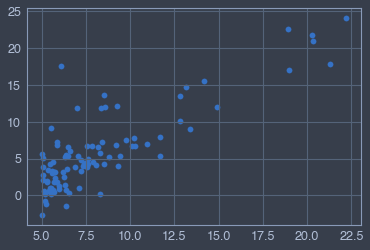

In [90]:
plt.scatter(x='population', y='profit', data=raw_data)
plt.show()

#### 定义获取必要数据的方法

In [91]:
def get_Xy(df):
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1]
    return X, y


def init_theta(X):
    return np.zeros(X.shape[1])

#### 定义代价函数及梯度递减方法

In [92]:
def computeCost(X, y, theta):
    m = len(y)
    inner = X @ theta - y
    squar_sum = inner.T @ inner
    J = squar_sum / (2 * m)
    return J


def gradientDescent(X, y, theta, alpha, iters):
    m = len(y)
    J_history = [computeCost(X,y,theta)]
    for i in np.arange(iters):
        theta = theta - X.T @ (X @ theta - y) * alpha / m
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

#### 计算 J 值

In [93]:
X, y = get_Xy(raw_data)
theta = init_theta(X)
J = computeCost(X, y, theta)
J

32.07273387745567

In [94]:
raw_data.head()

,Ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


[-2.28286727  1.03099898]


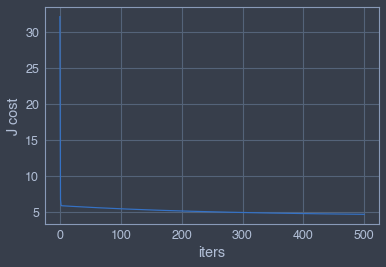

In [95]:
theta = [0,0]
alpha = 0.01
iters = 500
final_theta,J_history = gradientDescent(X,y,theta,alpha,iters)
print(final_theta)
# 画 J 的学习曲线
plt.plot(range(iters+1),J_history)
plt.xlabel('iters')
plt.ylabel('J cost')
plt.show()

In [96]:
J_history

[32.07273387745567,
 6.737190464870012,
 5.931593568604956,
 5.901154707081388,
 5.895228586444221,
 5.89009494311733,
 5.885004158443644,
 5.879932480491418,
 5.874879094762573,
 5.869843911806388,
 5.864826865312929,
 5.8598278899321805,
 5.85484692057229,
 5.849883892376588,
 5.844938740722034,
 5.8400114012183595,
 5.8351018097072265,
 5.830209902261388,
 5.825335615183862,
 5.820478885007098,
 5.815639648492154,
 5.810817842627869,
 5.806013404630045,
 5.801226271940628,
 5.796456382226899,
 5.791703673380653,
 5.7869680835173956,
 5.782249550975539,
 5.777548014315596,
 5.772863412319381,
 5.768195683989214,
 5.76354476854712,
 5.758910605434049,
 5.7542931343090755,
 5.749692295048627,
 5.745108027745684,
 5.740540272709012,
 5.735988970462381,
 5.731454061743792,
 5.726935487504702,
 5.722433188909257,
 5.717947107333528,
 5.713477184364749,
 5.709023361800549,
 5.704585581648199,
 5.700163786123856,
 5.6957579176518145,
 5.691367918863751,
 5.68699373259798,
 5.682635301898707

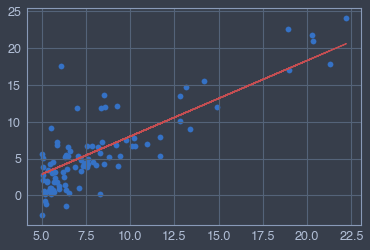

In [97]:
plt.figure
plt.scatter(x='population', y='profit', data=raw_data)
plt.plot(raw_data.population,raw_data.population*final_theta[1]+final_theta[0],'r-')
plt.show()

### 多变量线性回归

#### 定义泛化函数

In [98]:
def normalized(df):
    df = df.apply(lambda column:(column - column.mean())/column.std())
    return df


#### 读取数据

In [99]:
raw_data2 = pd.read_csv('ex1data2.txt',names=['sqr','rooms','price'])
raw_data2.head()

,sqr,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### 开始学习计算theta

In [100]:
data2 = normalized(raw_data2)
data2.insert(0,'ones',1)
X2, y2 = get_Xy(data2)
theta2 = init_theta(X2)
alpha = 0.01
iters = 500
final_theta2, J_history2 = gradientDescent(X2, y2, theta2, alpha, iters)
final_theta2

array([-1.18876540e-16,  8.30383883e-01,  8.23982853e-04])

#### 画 J 曲线

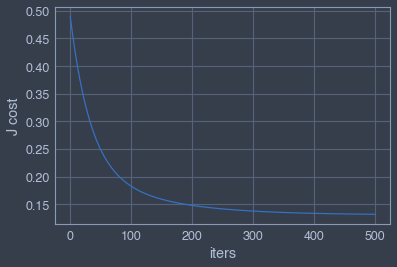

In [101]:
plt.plot(range(iters+1),J_history2)
plt.xlabel('iters')
plt.ylabel('J cost')
plt.show()

### Learning rate 学习率

#### 初始化 alpha

In [102]:
base = np.logspace(-1, -5, num=4)
candidate = np.sort(np.concatenate((base, base*3)))
print(candidate)

[1.00000000e-05 3.00000000e-05 2.15443469e-04 6.46330407e-04
 4.64158883e-03 1.39247665e-02 1.00000000e-01 3.00000000e-01]


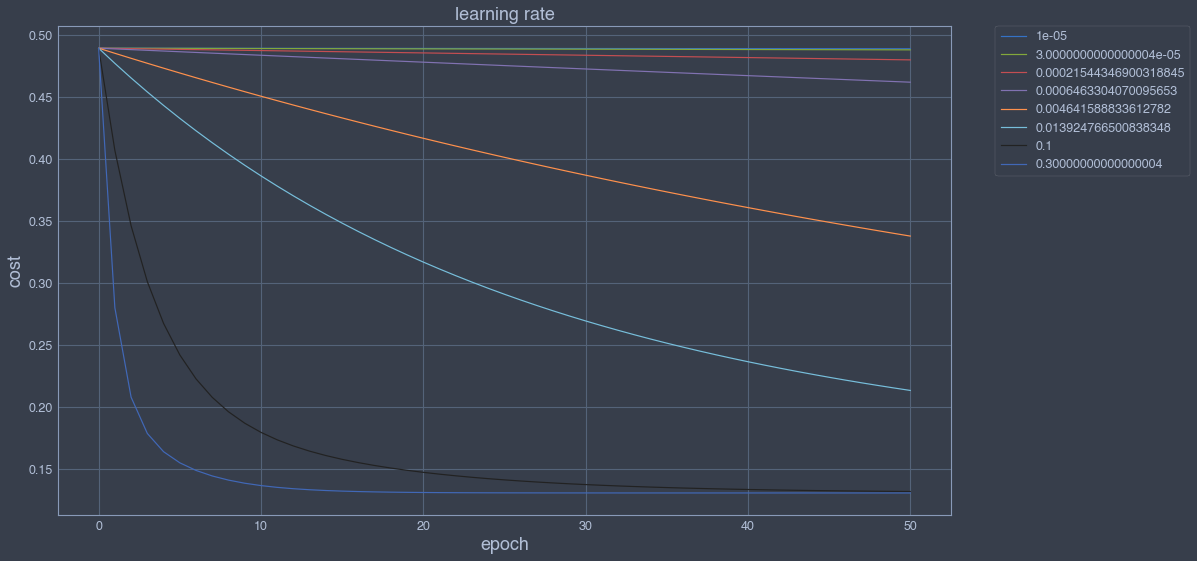

In [103]:
iters=50
fig,ax = plt.subplots(figsize=(16,9))
for alpha in candidate:
    _, cost = gradientDescent(X2,y2,theta2,alpha,iters)
    ax.plot(np.arange(iters+1),cost,label=alpha)
ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=18)
plt.show()

#### 正规方程
只适合特征数量在10000以内（因为要做矩阵逆操作），和线性模型。
公式是，$\theta = (X^TX)^{-1}X^Ty$

In [110]:
def normalEqn(X,y):
    return np.linalg.inv(X.T @ X) @ X.T @ y
theta3 = normalEqn(X2,y2)
theta3

array([-1.04083409e-16,  8.84765988e-01, -5.31788197e-02])

### 用tensorflow方式学习

Epoch: 0050 cost= 5.078 W= 1.0198352 b= -3.353242
Epoch: 0100 cost= 5.093 W= 1.0526738 b= -3.7202888
Epoch: 0150 cost= 5.094 W= 1.054813 b= -3.7426162
Epoch: 0200 cost= 5.094 W= 1.0549476 b= -3.744001
Epoch: 0250 cost= 5.094 W= 1.0549572 b= -3.744098
Epoch: 0300 cost= 5.094 W= 1.0549585 b= -3.7441094
Epoch: 0350 cost= 5.094 W= 1.0549585 b= -3.7441094
Epoch: 0400 cost= 5.094 W= 1.0549585 b= -3.7441094
Epoch: 0450 cost= 5.094 W= 1.0549585 b= -3.7441094
Epoch: 0500 cost= 5.094 W= 1.0549585 b= -3.7441094
Optimization Finished!
Training cost= 5.093563 W= 1.0549585 b= -3.7441094 



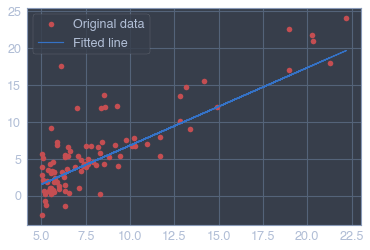

In [7]:
from __future__ import print_function, division
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
# 我是在Jupyter Notebook里运行的，所以需要这行
%matplotlib inline

# 读入数据
train = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
train_X = train['population'].values.reshape(-1, 1)
train_Y = train['profit'].values.reshape(-1, 1)

n_samples = train_X.shape[0]
# 学习率
learning_rate = 0.01
# 迭代次数
training_epochs = 500
# 每多少次输出一次迭代结果
display_step = 50

# 这个X和Y和上面的train_X,train_Y是不一样的，这里只是个占位符，
# 训练开始的时候需要“喂”(feed)数据给它
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# 定义模型参数
W = tf.Variable(0, name="weight", dtype=tf.float32)
b = tf.Variable(0, name="bias", dtype=tf.float32)

# 定义模型
pred = W * X + b
# 定义损失函数
cost = tf.reduce_sum(tf.pow(pred-Y, 2)) / (2 * n_samples)
# 使用Adam算法，至于为什么不使用一般的梯度下降算法，一会说
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# 初始化所有变量
init = tf.initialize_all_variables()

# 训练开始
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", '%04d' % (epoch + 1), "cost=", "{:.3f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
    
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    # 画图
    plt.plot(train_X, train_Y, 'ro', label="Original data")
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label="Fitted line")
    plt.legend()
    plt.show()

### tensorflow 2.0

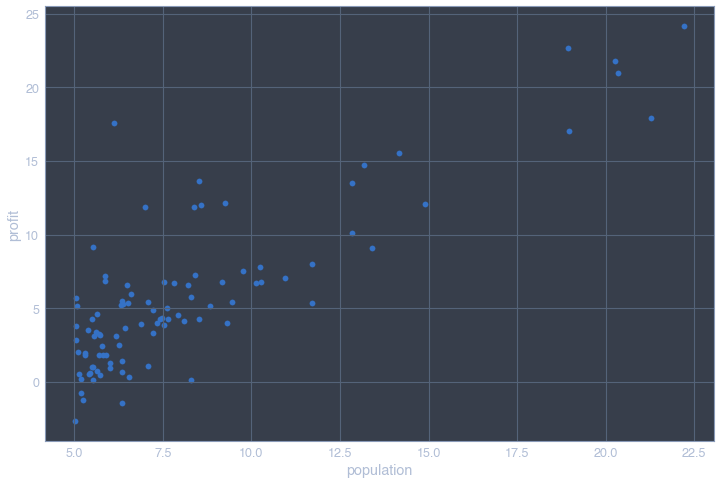

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 97 samples
Epoch 1/1000
97/97 [==============================] - 1s 7ms/sample - loss: 73.1069 - acc: 0.0000e+00
Epoch 2/1000
97/97 [==============================] - 0s 150us/sample - loss: 72.4953 - acc: 0.0000e+00
Epoch 3/1000
97/97 [==============================] - 0s 255us/sample - loss: 71.8958 - acc: 0.0000e+00
Epoch 4/1000
97/97 [==============================] - 0s 244us/sample - loss: 71.3252 - acc: 0.0000e+00
Epoch 5/1000
97/97 [==============================] - 0s 237us/sample - loss: 70.7834 - acc: 0.0000e+00
Epoch 6/1000
97/97 [==============================] - 0s 182us/sample - loss: 70.2296 - acc: 0.0000e+00
Epoch 7/1000
97/97 [==============================] - 0s 164us/sample - loss: 69.7265 - acc: 0.0000e+00
Epoch 8/1000
97/97 [==============================] - 0s 203us/sample - loss: 69.1592 - acc: 0.0000e+00
Epoch 9/1000
97/97 [==============================] - 0s 143us/sample

97/97 [==============================] - 0s 224us/sample - loss: 43.8754 - acc: 0.0000e+00
Epoch 76/1000
97/97 [==============================] - 0s 239us/sample - loss: 43.5926 - acc: 0.0000e+00
Epoch 77/1000
97/97 [==============================] - 0s 184us/sample - loss: 43.3263 - acc: 0.0000e+00
Epoch 78/1000
97/97 [==============================] - 0s 183us/sample - loss: 43.0619 - acc: 0.0000e+00
Epoch 79/1000
97/97 [==============================] - 0s 188us/sample - loss: 42.7979 - acc: 0.0000e+00
Epoch 80/1000
97/97 [==============================] - 0s 158us/sample - loss: 42.5267 - acc: 0.0000e+00
Epoch 81/1000
97/97 [==============================] - 0s 177us/sample - loss: 42.2881 - acc: 0.0000e+00
Epoch 82/1000
97/97 [==============================] - 0s 258us/sample - loss: 42.0592 - acc: 0.0000e+00
Epoch 83/1000
97/97 [==============================] - 0s 187us/sample - loss: 41.8450 - acc: 0.0000e+00
Epoch 84/1000
97/97 [==============================] - 0s 175us/sampl

97/97 [==============================] - 0s 160us/sample - loss: 27.8063 - acc: 0.0000e+00
Epoch 153/1000
97/97 [==============================] - 0s 185us/sample - loss: 27.6708 - acc: 0.0000e+00
Epoch 154/1000
97/97 [==============================] - 0s 204us/sample - loss: 27.4925 - acc: 0.0000e+00
Epoch 155/1000
97/97 [==============================] - 0s 170us/sample - loss: 27.3245 - acc: 0.0000e+00
Epoch 156/1000
97/97 [==============================] - 0s 156us/sample - loss: 27.0900 - acc: 0.0000e+00
Epoch 157/1000
97/97 [==============================] - 0s 208us/sample - loss: 26.9223 - acc: 0.0000e+00
Epoch 158/1000
97/97 [==============================] - 0s 176us/sample - loss: 26.7279 - acc: 0.0000e+00
Epoch 159/1000
97/97 [==============================] - 0s 172us/sample - loss: 26.5699 - acc: 0.0000e+00
Epoch 160/1000
97/97 [==============================] - 0s 202us/sample - loss: 26.4146 - acc: 0.0000e+00
Epoch 161/1000
97/97 [==============================] - 0s 19

97/97 [==============================] - 0s 167us/sample - loss: 18.9206 - acc: 0.0000e+00
Epoch 230/1000
97/97 [==============================] - 0s 177us/sample - loss: 18.8209 - acc: 0.0000e+00
Epoch 231/1000
97/97 [==============================] - 0s 191us/sample - loss: 18.7391 - acc: 0.0000e+00
Epoch 232/1000
97/97 [==============================] - 0s 156us/sample - loss: 18.6664 - acc: 0.0000e+00
Epoch 233/1000
97/97 [==============================] - 0s 138us/sample - loss: 18.5839 - acc: 0.0000e+00
Epoch 234/1000
97/97 [==============================] - 0s 179us/sample - loss: 18.5092 - acc: 0.0000e+00
Epoch 235/1000
97/97 [==============================] - 0s 149us/sample - loss: 18.4339 - acc: 0.0000e+00
Epoch 236/1000
97/97 [==============================] - 0s 168us/sample - loss: 18.3433 - acc: 0.0000e+00
Epoch 237/1000
97/97 [==============================] - 0s 289us/sample - loss: 18.2758 - acc: 0.0000e+00
Epoch 238/1000
97/97 [==============================] - 0s 18

97/97 [==============================] - 0s 258us/sample - loss: 15.2142 - acc: 0.0000e+00
Epoch 307/1000
97/97 [==============================] - 0s 152us/sample - loss: 15.1740 - acc: 0.0000e+00
Epoch 308/1000
97/97 [==============================] - 0s 204us/sample - loss: 15.1159 - acc: 0.0000e+00
Epoch 309/1000
97/97 [==============================] - 0s 153us/sample - loss: 15.0768 - acc: 0.0000e+00
Epoch 310/1000
97/97 [==============================] - 0s 169us/sample - loss: 15.0475 - acc: 0.0000e+00
Epoch 311/1000
97/97 [==============================] - 0s 207us/sample - loss: 15.0199 - acc: 0.0000e+00
Epoch 312/1000
97/97 [==============================] - 0s 152us/sample - loss: 14.9912 - acc: 0.0000e+00
Epoch 313/1000
97/97 [==============================] - 0s 145us/sample - loss: 14.9636 - acc: 0.0000e+00
Epoch 314/1000
97/97 [==============================] - 0s 143us/sample - loss: 14.9429 - acc: 0.0000e+00
Epoch 315/1000
97/97 [==============================] - 0s 17

97/97 [==============================] - 0s 167us/sample - loss: 13.7477 - acc: 0.0000e+00
Epoch 384/1000
97/97 [==============================] - 0s 170us/sample - loss: 13.7456 - acc: 0.0000e+00
Epoch 385/1000
97/97 [==============================] - 0s 164us/sample - loss: 13.7411 - acc: 0.0000e+00
Epoch 386/1000
97/97 [==============================] - 0s 226us/sample - loss: 13.7363 - acc: 0.0000e+00
Epoch 387/1000
97/97 [==============================] - 0s 163us/sample - loss: 13.7320 - acc: 0.0000e+00
Epoch 388/1000
97/97 [==============================] - 0s 227us/sample - loss: 13.7254 - acc: 0.0000e+00
Epoch 389/1000
97/97 [==============================] - 0s 178us/sample - loss: 13.7172 - acc: 0.0000e+00
Epoch 390/1000
97/97 [==============================] - 0s 167us/sample - loss: 13.7105 - acc: 0.0000e+00
Epoch 391/1000
97/97 [==============================] - 0s 125us/sample - loss: 13.7038 - acc: 0.0000e+00
Epoch 392/1000
97/97 [==============================] - 0s 16

97/97 [==============================] - 0s 143us/sample - loss: 13.0031 - acc: 0.0000e+00
Epoch 461/1000
97/97 [==============================] - 0s 175us/sample - loss: 12.9821 - acc: 0.0000e+00
Epoch 462/1000
97/97 [==============================] - 0s 157us/sample - loss: 12.9766 - acc: 0.0000e+00
Epoch 463/1000
97/97 [==============================] - 0s 135us/sample - loss: 12.9664 - acc: 0.0000e+00
Epoch 464/1000
97/97 [==============================] - 0s 135us/sample - loss: 12.9644 - acc: 0.0000e+00
Epoch 465/1000
97/97 [==============================] - 0s 125us/sample - loss: 12.9626 - acc: 0.0000e+00
Epoch 466/1000
97/97 [==============================] - 0s 189us/sample - loss: 12.9609 - acc: 0.0000e+00
Epoch 467/1000
97/97 [==============================] - 0s 160us/sample - loss: 12.9595 - acc: 0.0000e+00
Epoch 468/1000
97/97 [==============================] - 0s 171us/sample - loss: 12.9553 - acc: 0.0000e+00
Epoch 469/1000
97/97 [==============================] - 0s 19

97/97 [==============================] - 0s 142us/sample - loss: 12.7547 - acc: 0.0000e+00
Epoch 538/1000
97/97 [==============================] - 0s 158us/sample - loss: 12.7501 - acc: 0.0000e+00
Epoch 539/1000
97/97 [==============================] - 0s 135us/sample - loss: 12.7446 - acc: 0.0000e+00
Epoch 540/1000
97/97 [==============================] - 0s 169us/sample - loss: 12.7438 - acc: 0.0000e+00
Epoch 541/1000
97/97 [==============================] - 0s 156us/sample - loss: 12.7408 - acc: 0.0000e+00
Epoch 542/1000
97/97 [==============================] - 0s 142us/sample - loss: 12.7390 - acc: 0.0000e+00
Epoch 543/1000
97/97 [==============================] - 0s 176us/sample - loss: 12.7372 - acc: 0.0000e+00
Epoch 544/1000
97/97 [==============================] - 0s 191us/sample - loss: 12.7355 - acc: 0.0000e+00
Epoch 545/1000
97/97 [==============================] - 0s 152us/sample - loss: 12.7340 - acc: 0.0000e+00
Epoch 546/1000
97/97 [==============================] - 0s 17

97/97 [==============================] - 0s 158us/sample - loss: 12.6011 - acc: 0.0000e+00
Epoch 615/1000
97/97 [==============================] - 0s 139us/sample - loss: 12.5995 - acc: 0.0000e+00
Epoch 616/1000
97/97 [==============================] - 0s 138us/sample - loss: 12.5977 - acc: 0.0000e+00
Epoch 617/1000
97/97 [==============================] - 0s 139us/sample - loss: 12.5962 - acc: 0.0000e+00
Epoch 618/1000
97/97 [==============================] - 0s 170us/sample - loss: 12.5943 - acc: 0.0000e+00
Epoch 619/1000
97/97 [==============================] - 0s 178us/sample - loss: 12.5938 - acc: 0.0000e+00
Epoch 620/1000
97/97 [==============================] - 0s 165us/sample - loss: 12.5937 - acc: 0.0000e+00
Epoch 621/1000
97/97 [==============================] - 0s 246us/sample - loss: 12.5918 - acc: 0.0000e+00
Epoch 622/1000
97/97 [==============================] - 0s 126us/sample - loss: 12.5892 - acc: 0.0000e+00
Epoch 623/1000
97/97 [==============================] - 0s 15

97/97 [==============================] - 0s 165us/sample - loss: 12.4760 - acc: 0.0000e+00
Epoch 692/1000
97/97 [==============================] - 0s 169us/sample - loss: 12.4727 - acc: 0.0000e+00
Epoch 693/1000
97/97 [==============================] - 0s 180us/sample - loss: 12.4711 - acc: 0.0000e+00
Epoch 694/1000
97/97 [==============================] - 0s 178us/sample - loss: 12.4694 - acc: 0.0000e+00
Epoch 695/1000
97/97 [==============================] - 0s 176us/sample - loss: 12.4681 - acc: 0.0000e+00
Epoch 696/1000
97/97 [==============================] - 0s 206us/sample - loss: 12.4675 - acc: 0.0000e+00
Epoch 697/1000
97/97 [==============================] - 0s 235us/sample - loss: 12.4670 - acc: 0.0000e+00
Epoch 698/1000
97/97 [==============================] - 0s 170us/sample - loss: 12.4668 - acc: 0.0000e+00
Epoch 699/1000
97/97 [==============================] - 0s 204us/sample - loss: 12.4649 - acc: 0.0000e+00
Epoch 700/1000
97/97 [==============================] - 0s 22

97/97 [==============================] - 0s 260us/sample - loss: 12.2776 - acc: 0.0000e+00
Epoch 769/1000
97/97 [==============================] - 0s 137us/sample - loss: 12.2762 - acc: 0.0000e+00
Epoch 770/1000
97/97 [==============================] - 0s 200us/sample - loss: 12.2744 - acc: 0.0000e+00
Epoch 771/1000
97/97 [==============================] - 0s 196us/sample - loss: 12.2723 - acc: 0.0000e+00
Epoch 772/1000
97/97 [==============================] - 0s 162us/sample - loss: 12.2707 - acc: 0.0000e+00
Epoch 773/1000
97/97 [==============================] - 0s 194us/sample - loss: 12.2697 - acc: 0.0000e+00
Epoch 774/1000
97/97 [==============================] - 0s 236us/sample - loss: 12.2637 - acc: 0.0000e+00
Epoch 775/1000
97/97 [==============================] - 0s 259us/sample - loss: 12.2610 - acc: 0.0000e+00
Epoch 776/1000
97/97 [==============================] - 0s 281us/sample - loss: 12.2586 - acc: 0.0000e+00
Epoch 777/1000
97/97 [==============================] - 0s 21

97/97 [==============================] - 0s 171us/sample - loss: 12.1180 - acc: 0.0000e+00
Epoch 846/1000
97/97 [==============================] - 0s 196us/sample - loss: 12.1166 - acc: 0.0000e+00
Epoch 847/1000
97/97 [==============================] - 0s 165us/sample - loss: 12.1099 - acc: 0.0000e+00
Epoch 848/1000
97/97 [==============================] - 0s 214us/sample - loss: 12.1063 - acc: 0.0000e+00
Epoch 849/1000
97/97 [==============================] - 0s 216us/sample - loss: 12.1042 - acc: 0.0000e+00
Epoch 850/1000
97/97 [==============================] - 0s 262us/sample - loss: 12.1019 - acc: 0.0000e+00
Epoch 851/1000
97/97 [==============================] - 0s 222us/sample - loss: 12.1005 - acc: 0.0000e+00
Epoch 852/1000
97/97 [==============================] - 0s 170us/sample - loss: 12.0989 - acc: 0.0000e+00
Epoch 853/1000
97/97 [==============================] - 0s 158us/sample - loss: 12.0971 - acc: 0.0000e+00
Epoch 854/1000
97/97 [==============================] - 0s 19

97/97 [==============================] - 0s 270us/sample - loss: 11.9719 - acc: 0.0000e+00
Epoch 923/1000
97/97 [==============================] - 0s 178us/sample - loss: 11.9705 - acc: 0.0000e+00
Epoch 924/1000
97/97 [==============================] - 0s 204us/sample - loss: 11.9691 - acc: 0.0000e+00
Epoch 925/1000
97/97 [==============================] - 0s 192us/sample - loss: 11.9669 - acc: 0.0000e+00
Epoch 926/1000
97/97 [==============================] - 0s 202us/sample - loss: 11.9656 - acc: 0.0000e+00
Epoch 927/1000
97/97 [==============================] - 0s 152us/sample - loss: 11.9660 - acc: 0.0000e+00
Epoch 928/1000
97/97 [==============================] - 0s 173us/sample - loss: 11.9658 - acc: 0.0000e+00
Epoch 929/1000
97/97 [==============================] - 0s 166us/sample - loss: 11.9638 - acc: 0.0000e+00
Epoch 930/1000
97/97 [==============================] - 0s 177us/sample - loss: 11.9625 - acc: 0.0000e+00
Epoch 931/1000
97/97 [==============================] - 0s 21

97/97 [==============================] - 0s 151us/sample - loss: 11.8130 - acc: 0.0000e+00
Epoch 1000/1000
97/97 [==============================] - 0s 200us/sample - loss: 11.8110 - acc: 0.0000e+00


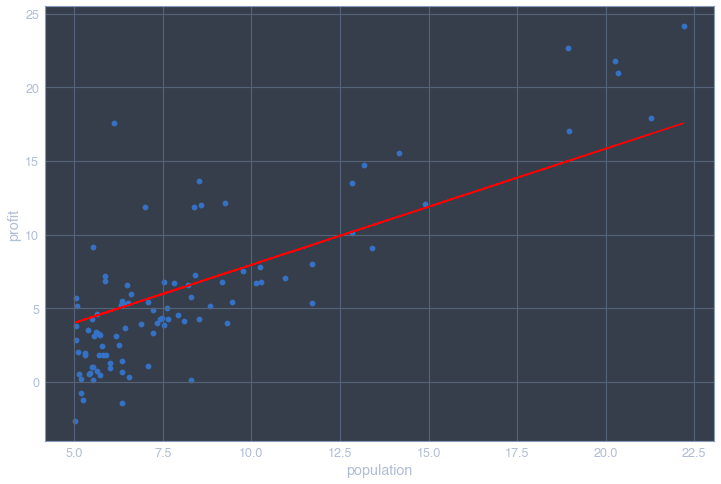

In [11]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['font.sans-serif'] = ['SimHei'] #设置字体 以便识别中文
# plt.rcParams['font.size'] = 24   #设置字体

# 读入数据
train = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
x = train['population'].values.reshape(-1, 1)
z = train['profit'].values.reshape(-1, 1)
#查看数据
fig = plt.figure(figsize=(12,8))
plt.scatter(x,z) #x轴数据 和y轴数据
#plt.plot(x,y,color='green') #原始曲线
plt.xlabel('population')
plt.ylabel('profit')
plt.show()


x_train = x
y_train = z
#使用 tf.keras.Sequential 建立模型，并且选择优化器和损失函数
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, input_shape=(1,))
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=1000)

#查看模型
q = model.predict(x)  #预测值
fig = plt.figure(figsize=(12,8))
plt.scatter(x,z) #x轴数据 和y轴数据
plt.plot(x,q[:,0],color='red') #训练曲线
#plt.plot(x,y,color='green') #原始曲线
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

In [13]:
x.shape

(97, 1)